In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\AMAN\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AMAN\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AMAN\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AMAN\Anaconda3\envs\tf\lib\site-packages\tensorflo

In [2]:
def rmsle(y_pred, y_test):
    return np.sqrt(np.mean((np.log(1 + y_pred) - np.log(1 + y_test)) ** 2))

In [3]:
###  categorising columns after data analysys
##  using df.head() and df.descrbe()

### INITIALISING GLOBAL VARIABLES

numerical_columns= ['budget', 'popularity', 'runtime', 'revenue']

categorical_columns = ['original_language', "status"]
multi_categorical_columms = ["genres", "production_countries", "spoken_languages"]
date_column = ["release_date"]
useless_columns = ["id", "belongs_to_collection", "homepage", "imdb_id", "original_title",
                   "overview", "poster_path", "production_companies", "tagline", "title", "Keywords", "cast", "crew"]

output = 'revenue'

sk_X = MinMaxScaler()
sk_Y = MinMaxScaler()

In [4]:
#### activation for neural network

activation_function = "relu"


In [5]:
#####  method to load CSV and format categorical data and removed useless columns

def load_and_process_data_frame(file_name=None):
    df = pd.read_csv(file_name)
    df.drop(useless_columns + multi_categorical_columms, inplace=True, axis=1)
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['release_date'])
    df['Date'] = df['Date'].map(dt.datetime.toordinal)
    df.drop(["release_date"], axis=1, inplace=True)


    df = pd.concat([df, pd.get_dummies(df['original_language'], prefix='original_language', dummy_na=True)],axis=1).drop(['original_language'], axis=1)
    df = pd.concat([df, pd.get_dummies(df['status'], prefix='status', dummy_na=True)], axis=1).drop(['status'], axis=1)

    #print(df.columns.values)

    return df

In [6]:
####  METHOD FOR VECTORISISNG DATAFRAME

def vectorize_data_frame(df=None, is_labled=False):
    if is_labled:

        Y = df[[output]]
        X = df.drop([output], axis=1)

        X = sk_X.fit_transform(X)
        Y = sk_Y.fit_transform(Y)
    else:
        Y = []
        X = sk_X.fit_transform(df)

    return X, Y


In [7]:
#####  METHOD FOR INITIALIZING MODEL

def initialize_model(input_dim=44):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer='normal', activation=activation_function))
    model.add(Dense(64, input_dim=input_dim, kernel_initializer='normal', activation=activation_function))

    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:

#####  METHOD FOR VIEWING RESULTS

def plot_result(y_test, y_pred, title):
    fig, ax = plt.subplots()
    plt.title(title)
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


MODEL INPUT DIMENSION 44
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1678 samples, validate on 420 samples
Epoch 1/20
1678/1678 [==============================] - 3s 2ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 2/20
1678/1678 [==============================] - 0s 94us/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/20
1678/1678 [==============================] - 0s 77us/step - loss: 0.0035 - val_loss: 0.0040
Epoch 4/20
1678/1678 [==============================] - 0s 94us/step - loss: 0.0034 - val_loss: 0.0042
Epoch 5/20
1678/1678 [==============================] - 0s 78us/step - loss: 0.0033 - val_loss: 0.0043
Epoch 6/20
1678/1678 [==============================] - 0s 93us/step - loss: 0.0032 - val_loss: 0.0043
Epoch 7/20
1678/1678 [==============================] - 0s 85us/step - loss: 0.0034 - val_loss: 0.0043
Epoch 8/20
1678/1678 [==============================] - 0s 77us/step - loss: 0.0032 - va

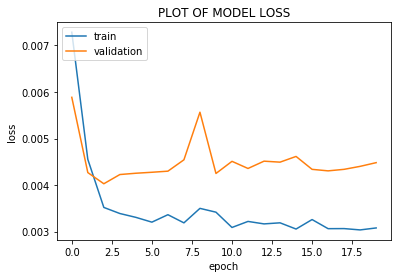

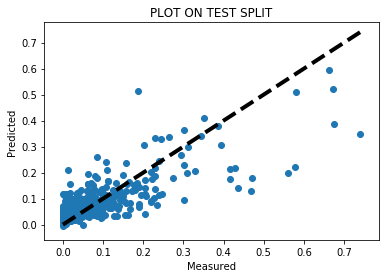

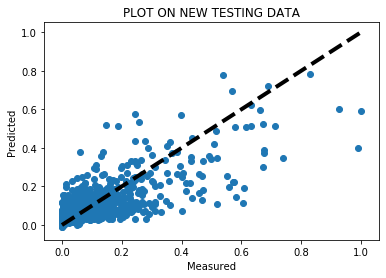

In [9]:
if __name__ == "__main__":

    train_data_file_path = "data.csv"

    ####   SPECIFY THE NAME OF THE TEST FILE HERE  test_data_file_path

    test_data_file_path = "data.csv"


    ###   MAKE SEE_PLOT TRUE TO SEE PLOTS
    see_plot = True

    #####  LOADING AND PRODESSING CSV FILE

    new_df= load_and_process_data_frame(file_name=train_data_file_path)

    final_column_list = new_df.columns.values

    Y = new_df[[output]]
    X = new_df.drop([output], axis=1)
    sk_X.fit(X)
    sk_Y.fit(Y)
    X = sk_X.fit_transform(X)
    Y = sk_Y.fit_transform(Y)

    #   TRAIN TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    #   TRAING MODEL
    if True:
        print("MODEL INPUT DIMENSION", len(X_train[0]))
        model = initialize_model(input_dim=len(X_train[0]))
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
        y_pred= model.predict(X_test)



    print("FINAL EVAL RMSLE LOSS ON TEST SPLIT :: ", rmsle(y_pred, y_test))



    test_df= load_and_process_data_frame(file_name=test_data_file_path)
    new_cloumns = test_df.columns.values


    ##############################################

    #### IF NEW TEST DATA IS PROVIED , THEN TESTING ON NEW DATA BEIGNS

    delta_columns = list(set(final_column_list)- set(new_cloumns))
    ####   HANDLING MISSING COLUMS IN NEW DATA
    if delta_columns:
        for item in delta_columns:
            test_df[item]=0




    test_df = test_df[final_column_list]



    _X , _Y = vectorize_data_frame(df=test_df, is_labled=True)



    y = model.predict(_X)


    print("FINAL EVAL RMSLE LOSS ON NEW DATA :: ", rmsle(y, _Y))

    # acy_y = np.array(sk_Y.inverse_transform(_Y)).flatten()
    # pred_y = np.array(sk_Y.inverse_transform(y)).flatten()



    if see_plot:
        print(history.history.keys())
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('PLOT OF MODEL LOSS')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()


    if see_plot:
        plot_result(y_test, y_pred, 'PLOT ON TEST SPLIT')
        plot_result(_Y, y, 'PLOT ON NEW TESTING DATA')